In [1]:
import h2o

In [18]:
from h2o.estimators.glm  import H2OGeneralizedLinearEstimator

In [2]:
h2o.connect()

Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,58 mins 21 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_avkash_8eyink
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.999 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [3]:
loan_data = h2o.import_file("https://raw.githubusercontent.com/prodramp/publiccode/master/loan-prediction/loan-train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
loan_data

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,nan,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,nan,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [5]:
type(loan_data)

h2o.frame.H2OFrame

In [7]:
abs(loan_data['LoanAmount'])

abs(LoanAmount)
nan
128
66
120
141
267
95
158
168
349


In [13]:
train, valid = loan_data.split_frame(ratios=[.66])

In [14]:
train.shape

(399, 13)

In [15]:
valid.shape

(215, 13)

In [19]:
loan_glm = H2OGeneralizedLinearEstimator(alpha=.25)

In [29]:
train.columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [27]:
predictors = train.columns[:-1]

In [28]:
predictors

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [30]:
response = "Loan_Status"

In [31]:
loan_glm.train(x=predictors,
                 y=response,
                 training_frame=train,
                 validation_frame=valid)

glm Model Build progress: |

/Users/avkash/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [Loan_ID]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644623179919_1137


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.25, lambda = 9.597E-4 )",17,16,3,py_6_sid_bc1a




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.14080628671537482
RMSE: 0.37524163776875136
LogLoss: 0.4476040382576959
Null degrees of freedom: 398
Residual degrees of freedom: 382
Null deviance: 486.27764154279055
Residual deviance: 357.1880225296414
AIC: 391.1880225296414
AUC: 0.785954381752701
AUCPR: 0.8741946667710377
Gini: 0.5719087635054021

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4390958175342246: 


,,N,Y,Error,Rate
0,N,52.0,67.0,0.563,(67.0/119.0)
1,Y,4.0,276.0,0.0143,(4.0/280.0)
2,Total,56.0,343.0,0.1779,(71.0/399.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.439096,0.886035,342.0
1,max f2,0.439096,0.943267,342.0
2,max f0point5,0.643546,0.842732,328.0
3,max accuracy,0.643546,0.822055,328.0
4,max precision,0.918373,1.000000,0.0
5,max recall,0.058372,1.000000,387.0
6,max specificity,0.918373,1.000000,0.0
7,max absolute_mcc,0.439096,0.556714,342.0
8,max min_per_class_accuracy,0.780918,0.675000,226.0
9,max mean_per_class_accuracy,0.643546,0.728256,328.0



Gains/Lift Table: Avg response rate: 70.18 %, avg score: 70.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010025,0.912355,1.425000,1.425000,1.000000,0.916265,1.000000,0.916265,0.014286,0.014286,42.500000,42.500000,0.014286
1,2,0.020050,0.907242,1.425000,1.425000,1.000000,0.910274,1.000000,0.913269,0.014286,0.028571,42.500000,42.500000,0.028571
2,3,0.030075,0.905294,1.425000,1.425000,1.000000,0.906365,1.000000,0.910968,0.014286,0.042857,42.500000,42.500000,0.042857
3,4,0.040100,0.903055,1.425000,1.425000,1.000000,0.904491,1.000000,0.909349,0.014286,0.057143,42.500000,42.500000,0.057143
4,5,0.050125,0.900416,0.712500,1.282500,0.500000,0.902020,0.900000,0.907883,0.007143,0.064286,-28.750000,28.250000,0.047479
5,6,0.100251,0.891640,1.282500,1.282500,0.900000,0.895640,0.900000,0.901761,0.064286,0.128571,28.250000,28.250000,0.094958
6,7,0.150376,0.882197,1.282500,1.282500,0.900000,0.887044,0.900000,0.896856,0.064286,0.192857,28.250000,28.250000,0.142437
7,8,0.200501,0.871015,1.282500,1.282500,0.900000,0.877978,0.900000,0.892136,0.064286,0.257143,28.250000,28.250000,0.189916
8,9,0.300752,0.845812,1.318125,1.294375,0.925000,0.857732,0.908333,0.880668,0.132143,0.389286,31.812500,29.437500,0.296849
9,10,0.401003,0.823586,1.211250,1.273594,0.850000,0.834247,0.893750,0.869063,0.121429,0.510714,21.125000,27.359375,0.367857




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.15657819953809668
RMSE: 0.3956996329769547
LogLoss: 0.4861014468281265
Null degrees of freedom: 214
Residual degrees of freedom: 198
Null deviance: 277.2211319682912
Residual deviance: 209.0236221360944
AIC: 243.0236221360944
AUC: 0.7911441250241172
AUCPR: 0.8681423060166512
Gini: 0.5822882500482345

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.580273862808066: 


,,N,Y,Error,Rate
0,N,33.0,40.0,0.5479,(40.0/73.0)
1,Y,3.0,139.0,0.0211,(3.0/142.0)
2,Total,36.0,179.0,0.2,(43.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.580274,0.866044,178.0
1,max f2,0.580274,0.930388,178.0
2,max f0point5,0.672986,0.814815,166.0
3,max accuracy,0.618084,0.800000,174.0
4,max precision,0.919223,1.000000,0.0
5,max recall,0.045917,1.000000,213.0
6,max specificity,0.919223,1.000000,0.0
7,max absolute_mcc,0.580274,0.546553,178.0
8,max min_per_class_accuracy,0.784216,0.684932,120.0
9,max mean_per_class_accuracy,0.672986,0.725063,166.0



Gains/Lift Table: Avg response rate: 66.05 %, avg score: 69.12 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,0.916424,1.514085,1.514085,1.000000,0.918224,1.000000,0.918224,0.021127,0.021127,51.408451,51.408451,0.021127
1,2,0.023256,0.913551,1.514085,1.514085,1.000000,0.914209,1.000000,0.916618,0.014085,0.035211,51.408451,51.408451,0.035211
2,3,0.032558,0.909187,1.514085,1.514085,1.000000,0.910933,1.000000,0.914994,0.014085,0.049296,51.408451,51.408451,0.049296
3,4,0.041860,0.906380,1.514085,1.514085,1.000000,0.908314,1.000000,0.913509,0.014085,0.063380,51.408451,51.408451,0.063380
4,5,0.051163,0.903613,1.514085,1.514085,1.000000,0.904548,1.000000,0.911880,0.014085,0.077465,51.408451,51.408451,0.077465
5,6,0.102326,0.884702,1.376440,1.445262,0.909091,0.894731,0.954545,0.903306,0.070423,0.147887,37.644046,44.526248,0.134189
6,7,0.153488,0.871646,1.376440,1.422322,0.909091,0.877243,0.939394,0.894618,0.070423,0.218310,37.644046,42.232181,0.190913
7,8,0.200000,0.861751,1.362676,1.408451,0.900000,0.866313,0.930233,0.888035,0.063380,0.281690,36.267606,40.845070,0.240594
8,9,0.302326,0.845253,1.101152,1.304442,0.727273,0.852467,0.861538,0.875997,0.112676,0.394366,10.115237,30.444204,0.271079
9,10,0.400000,0.827148,1.225687,1.285211,0.809524,0.835944,0.848837,0.866216,0.119718,0.514085,22.568746,28.521127,0.336002




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-11 16:59:57,0.000 sec,0,243.138821,0.609370,,,,,,,,,,,,,,
1,,2022-02-11 16:59:57,0.003 sec,1,179.801984,0.451935,,,,,,,,,,,,,,
2,,2022-02-11 16:59:57,0.005 sec,2,178.622254,0.449349,,,,,,,,,,,,,,
3,,2022-02-11 16:59:57,0.006 sec,3,178.594011,0.449323,0.375242,0.447604,0.327236,0.785954,0.874195,1.425,0.177945,0.3957,0.486101,0.301772,0.791144,0.868142,1.51408,0.2



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit_History,1.398467,1.000000,0.405391
1,Property_Area.Semiurban,0.441325,0.315577,0.127932
2,Property_Area.Rural,0.371814,0.265873,0.107782
3,Married.Yes,0.233200,0.166754,0.067601
4,Married.No,0.221769,0.158580,0.064287
5,LoanAmount,0.200995,0.143725,0.058265
6,CoapplicantIncome,0.109576,0.078355,0.031764
7,Gender.Male,0.096707,0.069152,0.028034
8,Gender.Female,0.093320,0.066730,0.027052
9,Dependents,0.074546,0.053305,0.021610


In [49]:
loan_glm.algo

'glm'

In [34]:
loan_glm.accuracy()

[[0.6435458802470704, 0.8220551378446115]]

In [41]:
loan_glm.mse()

0.14080628671537482

In [42]:
perf = loan_glm.model_performance()

In [48]:
perf.error()

[[0.6435458802470704, 0.17794486215538852]]

In [44]:
perf


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.14080628671537482
RMSE: 0.37524163776875136
LogLoss: 0.4476040382576959
Null degrees of freedom: 398
Residual degrees of freedom: 382
Null deviance: 486.27764154279055
Residual deviance: 357.1880225296414
AIC: 391.1880225296414
AUC: 0.785954381752701
AUCPR: 0.8741946667710377
Gini: 0.5719087635054021

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4390958175342246: 


,,N,Y,Error,Rate
0,N,52.0,67.0,0.563,(67.0/119.0)
1,Y,4.0,276.0,0.0143,(4.0/280.0)
2,Total,56.0,343.0,0.1779,(71.0/399.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.439096,0.886035,342.0
1,max f2,0.439096,0.943267,342.0
2,max f0point5,0.643546,0.842732,328.0
3,max accuracy,0.643546,0.822055,328.0
4,max precision,0.918373,1.000000,0.0
5,max recall,0.058372,1.000000,387.0
6,max specificity,0.918373,1.000000,0.0
7,max absolute_mcc,0.439096,0.556714,342.0
8,max min_per_class_accuracy,0.780918,0.675000,226.0
9,max mean_per_class_accuracy,0.643546,0.728256,328.0



Gains/Lift Table: Avg response rate: 70.18 %, avg score: 70.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010025,0.912355,1.425000,1.425000,1.000000,0.916265,1.000000,0.916265,0.014286,0.014286,42.500000,42.500000,0.014286
1,2,0.020050,0.907242,1.425000,1.425000,1.000000,0.910274,1.000000,0.913269,0.014286,0.028571,42.500000,42.500000,0.028571
2,3,0.030075,0.905294,1.425000,1.425000,1.000000,0.906365,1.000000,0.910968,0.014286,0.042857,42.500000,42.500000,0.042857
3,4,0.040100,0.903055,1.425000,1.425000,1.000000,0.904491,1.000000,0.909349,0.014286,0.057143,42.500000,42.500000,0.057143
4,5,0.050125,0.900416,0.712500,1.282500,0.500000,0.902020,0.900000,0.907883,0.007143,0.064286,-28.750000,28.250000,0.047479
5,6,0.100251,0.891640,1.282500,1.282500,0.900000,0.895640,0.900000,0.901761,0.064286,0.128571,28.250000,28.250000,0.094958
6,7,0.150376,0.882197,1.282500,1.282500,0.900000,0.887044,0.900000,0.896856,0.064286,0.192857,28.250000,28.250000,0.142437
7,8,0.200501,0.871015,1.282500,1.282500,0.900000,0.877978,0.900000,0.892136,0.064286,0.257143,28.250000,28.250000,0.189916
8,9,0.300752,0.845812,1.318125,1.294375,0.925000,0.857732,0.908333,0.880668,0.132143,0.389286,31.812500,29.437500,0.296849
9,10,0.401003,0.823586,1.211250,1.273594,0.850000,0.834247,0.893750,0.869063,0.121429,0.510714,21.125000,27.359375,0.367857


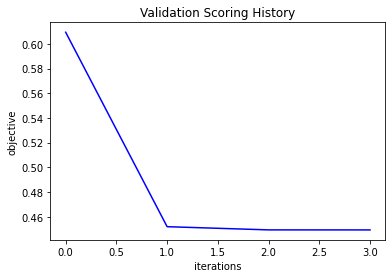

In [50]:
loan_glm.plot()

In [51]:
loan_glm.varimp()

[('Credit_History', 1.398466944694519, 1.0, 0.40539102123085735),
 ('Property_Area.Semiurban',
  0.44132450222969055,
  0.3155773569793553,
  0.12793222702319568),
 ('Property_Area.Rural',
  0.3718140423297882,
  0.26587259980678857,
  0.10778236475297706),
 ('Married.Yes', 0.233199805021286, 0.1667538913994325, 0.06760053032863542),
 ('Married.No', 0.22176924347877502, 0.15858025412764995, 0.0642870111678569),
 ('LoanAmount', 0.20099498331546783, 0.1437252300299262, 0.05826491777847167),
 ('CoapplicantIncome',
  0.1095762774348259,
  0.07835457094680327,
  0.03176423953423024),
 ('Gender.Male',
  0.0967070609331131,
  0.06915219648201108,
  0.028033679552199372),
 ('Gender.Female',
  0.09332021325826645,
  0.06673036757307932,
  0.027051891857561114),
 ('Dependents', 0.07454577833414078, 0.053305355994971014, 0.0216095127038757),
 ('ApplicantIncome',
  0.050640769302845,
  0.036211631240169906,
  0.014679870168887693),
 ('Education.Graduate',
  0.04132713004946709,
  0.029551738928298

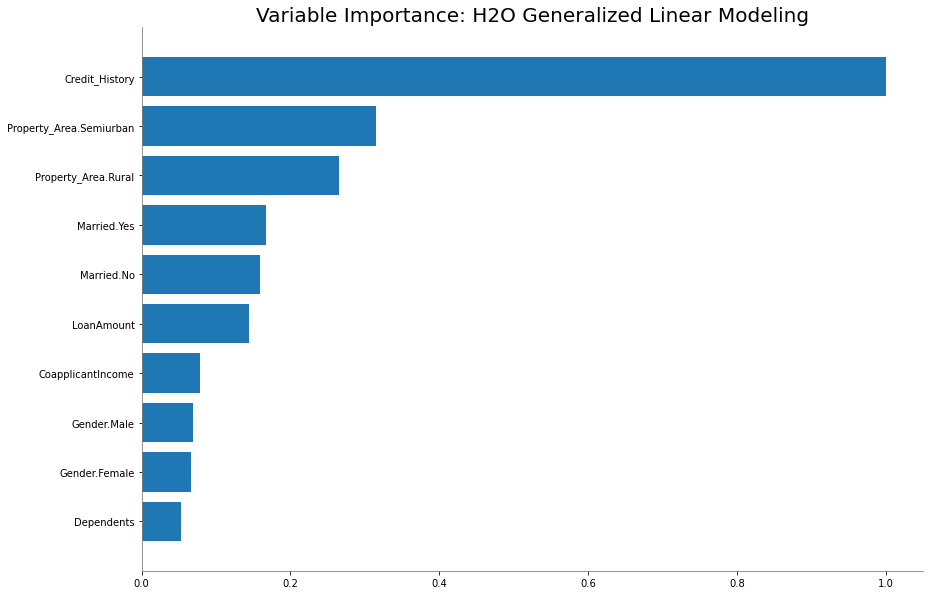

<Figure size 432x288 with 0 Axes>

In [52]:
loan_glm.varimp_plot()